<a href="https://colab.research.google.com/github/JunukCha/deep-learning-study/blob/main/%EB%A7%88%EB%A5%B4%EC%BD%94%ED%94%84_%EC%97%B0%EC%87%84_%EB%AA%AC%ED%85%8C%EC%B9%B4%EB%A5%BC%EB%A1%9C_%EB%B0%A9%EB%B2%95_MCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 몬테카를로 원의 넓이 구하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

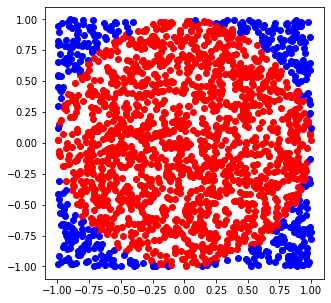

원의 넓이: 3.122


In [2]:
n = 2000

circle = np.random.uniform(size=(n,2))*2-1

total_c = 0
in_c = 0
plt.figure(figsize=(5,5))
for _circle in circle:
    total_c += 1
    dist = np.linalg.norm(_circle)
    if dist < 1:
        in_c += 1
        plt.scatter(_circle[0], _circle[1], c="r")
    else:
        plt.scatter(_circle[0], _circle[1], c="b")
plt.show()

print("원의 넓이:", in_c/total_c*4)

# MCMC

타겟 분포

In [3]:
x = np.linspace(-10, 20, 10000)
f_x = 0.3*(np.exp(-0.2*x**2)) + 0.7*(np.exp(-0.2*(x-10)**2))

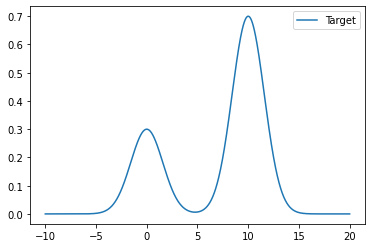

In [4]:
plt.plot(x, f_x, label="Target")
plt.legend()
plt.show()

Random initialization

x_0 = 7

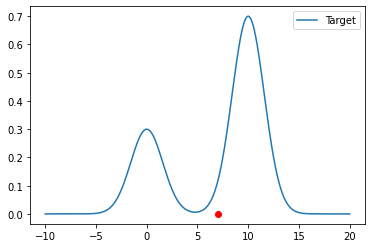

In [5]:
plt.plot(x, f_x, label="Target")
plt.scatter(7, 0, c="r")
plt.legend()
plt.show()

평균이 7이고 표준편차가 2인 정규분포

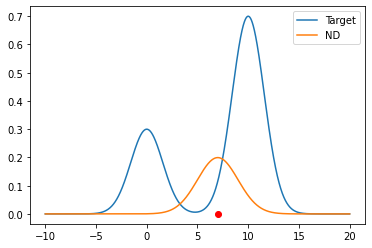

In [6]:
mean = 7
variance = 2**2
normal_distribution = 1/(np.sqrt(2*np.pi*variance))*np.exp(-(x-mean)**2/(2*variance))

plt.plot(x, f_x, label="Target")
plt.plot(x, normal_distribution, label="ND")
plt.scatter(7, 0, c="r")
plt.legend()
plt.show()

## 다음 제안 수용 거절

In [7]:
f_x_lambda = lambda x: 0.3*(np.exp(-0.2*x**2)) + 0.7*(np.exp(-0.2*(x-10)**2))

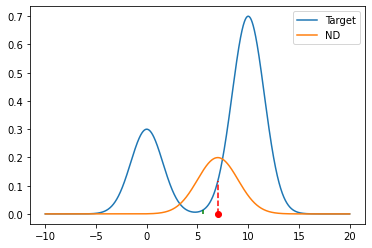

In [8]:
mean = 7
variance = 2**2
normal_distribution = 1/(np.sqrt(2*np.pi*variance))*np.exp(-(x-mean)**2/(2*variance))

x_1 = 5.5
plt.plot(x, f_x, label="Target")
plt.plot(x, normal_distribution, label="ND")
plt.scatter(7, 0, c="r")
plt.plot((7, 7), (0, f_x_lambda(7)), "r--")
plt.plot((x_1, x_1), (0, f_x_lambda(x_1)), "g--")
plt.legend()
plt.show()

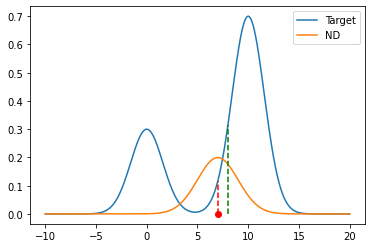

In [9]:
mean = 7
variance = 2**2
normal_distribution = 1/(np.sqrt(2*np.pi*variance))*np.exp(-(x-mean)**2/(2*variance))

x_1 = 8
plt.plot(x, f_x, label="Target")
plt.plot(x, normal_distribution, label="ND")
plt.scatter(7, 0, c="r")
plt.plot((7, 7), (0, f_x_lambda(7)), "r--")
plt.plot((x_1, x_1), (0, f_x_lambda(x_1)), "g--")
plt.legend()
plt.show()

### 수용 시 정규분포를 다시 그리고 제안을 받습니다.

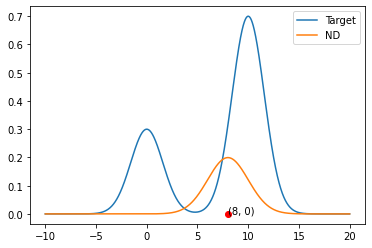

In [10]:
mean = 8
variance = 2**2
normal_distribution = 1/(np.sqrt(2*np.pi*variance))*np.exp(-(x-mean)**2/(2*variance))

plt.plot(x, f_x, label="Target")
plt.plot(x, normal_distribution, label="ND")
plt.scatter(8, 0, c="r")
plt.text(8, 0, "(8, 0)")
plt.legend()
plt.show()

# 패자부활전이 왜 필요한가?

### 패자부활전이 없다면?

In [11]:
n = 10000

x_0 = 7

x = [x_0]
std = 2
for _ in range(n):
    # u = np.random.rand()
    x_prev = x[-1]
    x_next = np.random.randn()*std + x_prev
    if f_x_lambda(x_next)/f_x_lambda(x_prev) > 1:
        x.append(x_next)
    else:
        x.append(x_prev)        

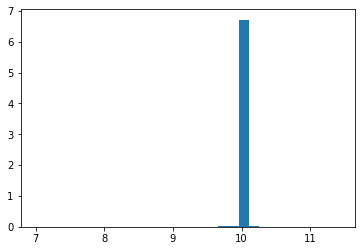

In [12]:
plt.hist(x, bins=30, density=True)
plt.show()

### 패자부활전이 있다면?

In [13]:
n = 10000

x_0 = 7

x = [x_0]
std = 2
for _ in range(n):
    u = np.random.rand()
    x_prev = x[-1]
    x_next = np.random.randn()*std + x_prev
    if f_x_lambda(x_next)/f_x_lambda(x_prev) > u:
        x.append(x_next)
    else:
        x.append(x_prev)        

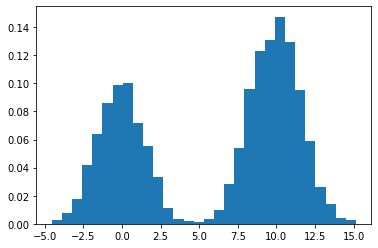

In [14]:
plt.hist(x, bins=30, density=True)
plt.show()

# Metropolis-Hastings

In [15]:
n = 10000

x_0 = (np.random.rand()-0.5)*30 + 5

x = [x_0]
std = 2
normal_distribution_lambda = lambda x,mean,variance:1/(np.sqrt(2*np.pi*variance))*np.exp(-(x-mean)**2/(2*variance))

for _ in range(n):
    u = np.random.rand()
    x_prev = x[-1]
    x_next = np.random.randn()*std + x_prev
    alpha = min(1, (f_x_lambda(x_next)/normal_distribution_lambda(x_next, x_prev, std**2))/(f_x_lambda(x_prev)/normal_distribution_lambda(x_prev, x_next, std**2)))
    if alpha > u:
        x.append(x_next)
    else:
        x.append(x_prev)

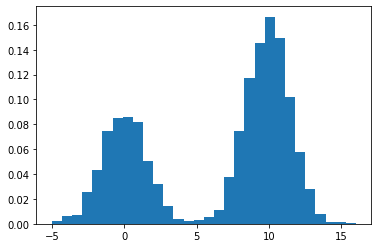

In [16]:
plt.hist(x, bins=30, density=True)
plt.show()